# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


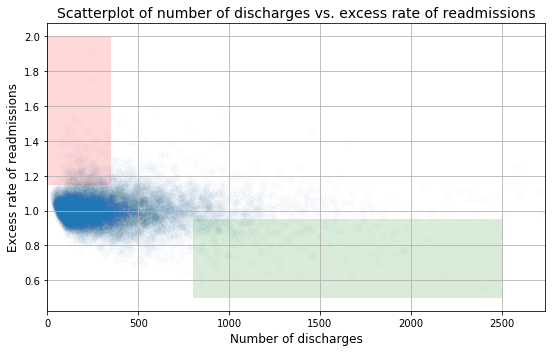

In [80]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.01)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [15]:
from scipy import stats


Answers work below:
    
A. I agree that the graph shows a negative correlation between number of discharges and excess readmission rates but I don't
agree with calling it significant without showing test statistic values or confidence intervals. The idea that hopsitals 
with lower capacity have higher readmissions due to lack of proper equipment is too much of a hypothetical to call it a conclusion.
The recommendations are slightly contradicting to each other and the conclusions mentioned. If small capacity hospitals do not
have the proper facilities to prevent readmission then combining them into a larger hospital does not solve an equipment issue.
Also smaller hospitals may not be able to show upgraded allocation due to resources causing them to close and removing health care
for the area they are in.

B. 
1. In order to evaluate the conclusions that have been suggested by the previous report I will divide the data into low and high
capacity samples based on the division of boxes in the figure. Low capacity (Discharges < 350) High Capacity (Discharges > 800).
Based on this division we will use an independent two sample z-test to compare the mean excessive readmission rate between the two groups.
We will be sampling a population of hospitals so we will have total population data we can access. Indiviual data is unique for
each hospital which is why we use an independent test.

2. The p-value calculated for the two-tailed test is 1.99.

3. The p-value shown is extremely close to 2 which means we cannot reject the null hypothesis and we can say the mean excessive
readmission ratios for both sample groups (low capacity and high capacity). Sampling the confidence intervals from each sample 
shows that they almost overlap. 

4. The difference between statistical significant and practical significance is very interesting because they are not always the same
a study which shows statistical significance may not be practical. In this case the data shows no statistical significance and
it also not practically significant. By dividing the number of readmissions by the excessive readmission rate and then subtracting
that from the number of discharges we will find the amount of readmission which is considered excessive. Calculating the mean 
of these gives us 0.60 and the mean percentage of readmissions that are considered excessive is 0.002 or 0.2%. Doing these calculations
show us that even if there was statiscial significance for low capacity on average changes to the system would only reduce 
readmission by 0.60 readmissions on average accounting for 0.2% of readmission. Thus even though there is no statistical significance
I would not recommend that hospitals make drastic changes or enforce regulations that only account for less than 1 readmission on average.

5. Scatterplots are very good for looking at all of your data and finding general trends within the data, however one disadvantage 
is that there can be a lot of issues with overplotting which can skew your interpretation of the data. Overplotting occurs here
since the values are spread out a lot it is hard to see the edge cases and not obscure the actual trends. By dropping the alpha
down to 0.01 we can see the mean is much closer to 1 than it would seem when plotted with alpha 0.2. There are many ways to graph this
to convey the same information more clearly. As mentioned before the graph becomes much less misleading when the alpha value is
lowered so I think that is the easiest way to convey the information more clearly. Another way to compare excess readmissions would be 
to use a two column bar chart by chunking the data every 100-200 values for Number of Discharges. However the scatterplot is the 
best graph for showing comparisons so tweaking the variables to make it more readable is the best choice. Along with reducing alpha
values to reveal the trends better and features like error bars and linear regression fits will be useful for analzing the data
quickly with visuals.




In [46]:
#Work for Question 2
lower = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100][81:]
upper = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000][:-3]
mean_pop, mean_lower, mean_upper = (np.mean(clean_hospital_read_df['Excess Readmission Ratio']), 
                                        np.mean(lower['Excess Readmission Ratio']), 
                                           np.mean(upper['Excess Readmission Ratio']))
std_pop, std_lower, std_upper = (np.std(clean_hospital_read_df['Excess Readmission Ratio']), 
                                        np.std(lower['Excess Readmission Ratio']), 
                                        np.std(upper['Excess Readmission Ratio']))
se_lower, se_upper = std_lower/np.sqrt(len(lower)), std_upper/np.sqrt(len(upper))
se_diff = np.sqrt(se_lower**2 + se_upper**2)
t = (mean_lower - mean_upper)/se_diff

p = stats.t.cdf(t, df=(len(lower)+len(upper)-2))*2
p

1.9999999999998945

In [49]:
#statistical analysis for alpha=0.01
error_margin = 2.58*se_diff
conf_int_lower =stats.norm.interval(0.99, loc=mean_lower, scale=se_diff)
conf_int_upper =stats.norm.interval(0.99, loc=mean_upper, scale=se_diff)
error_margin, conf_int_lower, conf_int_upper

(0.014983985313453414,
 (1.0076585872015522, 1.0375781131351489),
 (0.96411328051146294, 0.99403280644505965))

In [79]:
temp = clean_hospital_read_df[83:-3]
readmission = temp['Number of Readmissions'] - temp['Number of Readmissions']/temp['Excess Readmission Ratio']
readmission_percent = readmission/temp['Number of Discharges']
np.mean(readmission), np.mean(readmission_percent)

(0.6356380369166666, 0.0025902485830684467)

In [67]:
temp.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013
1602,TENNOVA HEALTHCARE-JEFFERSON MEMORIAL HOSPITAL,440056,TN,READM-30-AMI-HRRP,31,NaN,1.0992,24.2,22.1,13.0,07/01/2010,06/30/2013
2048,FORT MADISON COMMUNITY HOSPITAL,160122,IA,READM-30-AMI-HRRP,33,NaN,1.0847,22.6,20.9,12.0,07/01/2010,06/30/2013


In [86]:
inds = np.arange(len(temp))
ecdf = np.empty(len(temp))
y = np.arange(1, len(temp)+1)/float(len(temp))
print (ecdf)
for i in temp['Number of Discharges']:
    ecdf[i] = np.sum(ecdf)/(i+1)
    
print (inds, ecdf)

[  9.52047923e-312   9.52054026e-312   2.00000000e+000 ...,
   1.14890000e+004   1.14900000e+004   1.14910000e+004]
[    0     1     2 ..., 11489 11490 11491] [  9.52047923e-312   9.52054026e-312   2.00000000e+000 ...,
   1.14890000e+004   1.14900000e+004   1.14910000e+004]


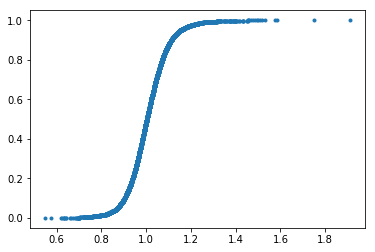

In [89]:
plt.plot(temp.sort_values('Excess Readmission Ratio')['Excess Readmission Ratio'], y, marker='.', linestyle='None')
plt.show()

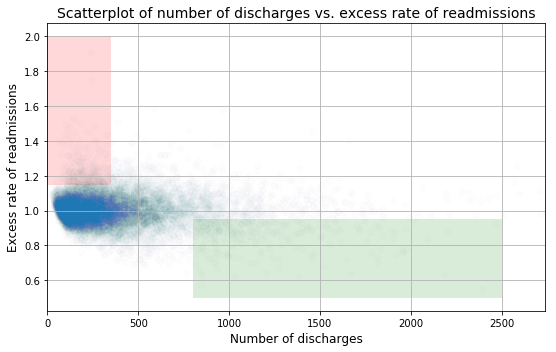

In [93]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.008)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()